In [1]:
# Load basic Library
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
import pandas_profiling
from sklearn.neighbors import KNeighborsClassifier, NearestNeighbors
import matplotlib.pyplot as plt

# Read dataset
data_frame = pd.read_csv("data.csv")

ModuleNotFoundError: No module named 'numpy'

In [4]:
# Overview 5 Component which on top of data
print(data_frame.head(5))

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

In [5]:
# Short Summary about data
print(data_frame.describe())

                 id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813     

In [6]:
# Not neccessary but i advice you often review it
print(data_frame)

           id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compa

In [7]:
# Get the number of the columns in data
overview_all_columns = data_frame.columns
print(overview_all_columns)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


In [ ]:
# Make a Total about data by Library Pandas Proofing
profile = data_frame.profile_report(title = "Report_for_data")
profile.to_file(output_file="Report_for_data.html")

In [8]:
#Drop column unneccessary or column which lack of data
data_frame = data_frame.dropna(axis=1)
print(data_frame)

           id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compa

In [9]:
# Set Variable To predict
predict =data_frame.diagnosis
# Set feature which is a component to make platform to predict
data_feature = ['radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean','concavity_mean','concave points_mean',
'symmetry_mean','fractal_dimension_mean','radius_se','texture_se','perimeter_se','area_se','smoothness_se','compactness_se','concavity_se','concave points_se',
'symmetry_se','fractal_dimension_se','radius_worst','texture_worst','perimeter_worst','area_worst','smoothness_worst','compactness_worst','concavity_worst',
'concave points_worst','symmetry_worst','fractal_dimension_worst']
x = data_frame[data_feature]

In [10]:
print(x.describe())
print(x.head())
print(x.value_counts())
print(x)

       radius_mean  texture_mean  perimeter_mean    area_mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%      

In [11]:
data_model = KNeighborsClassifier()

In [12]:
print(x.head())

   radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   fractal_dimension_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0           

In [13]:
from sklearn.metrics import confusion_matrix , accuracy_score,recall_score,precision_score
from sklearn.model_selection import train_test_split

# Split data byte scale 66/33 it divide by Train data and test data
x_train ,  x_test, y_train, y_test = train_test_split(x,predict , test_size=0.33 , random_state=42)

pred_train = data_model.fit(x_train ,y_train)
true_train = pred_train.predict(x_train)
# Check probality on Train data
print("Confusion Matrix on train data: ", confusion_matrix(true_train , y_train , labels=['M','B']))
print("Accuracy on train data: ", accuracy_score(true_train , y_train))

Confusion Matrix on train data:  [[122   7]
 [ 23 229]]
Accuracy on train data:  0.9212598425196851


In [14]:
# Predict on test model

true_test = pred_train.predict(x_test)
# Check probality on test data
print("Confusion Matrix on Test: ", confusion_matrix(true_test , y_test , labels=['M','B']))
print("Accuracy on Test: ", accuracy_score(true_test , y_test))


Confusion Matrix on Test:  [[ 63   5]
 [  4 116]]
Accuracy on Test:  0.9521276595744681


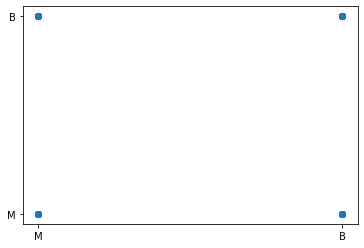

In [15]:
plt.scatter(y_train,true_train)

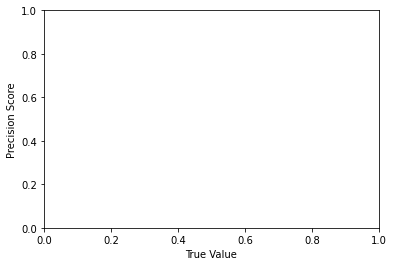

In [16]:
plt.xlabel("True Value")
plt.ylabel("Precision Score")
plt.show()

In [17]:
train_score , test_score = list(), list()

# Run through dept tree
value = [i for i in range(1,51)]
for i in value:
    # configure models
    model = KNeighborsClassifier(n_neighbors=i)
    # fit model on training data set
    model.fit(x_train,y_train)
    #evaluate on training data set
    train_true_1 = model.predict(x_train)
    train_accuracy = accuracy_score(y_train,train_true_1)
    train_score.append(train_accuracy)

    # evaluate on testing data set

    test_true_1 = model.predict(x_test)
    test_accuracy_1 = accuracy_score(y_test,test_true_1)
    test_score.append(test_accuracy_1)

    # Print summarize process
    print('>%d, train: %.3f, test: %.3f' % (i, train_accuracy , test_accuracy_1))


>1, train: 1.000, test: 0.931
>2, train: 0.934, test: 0.947
>3, train: 0.945, test: 0.941
>4, train: 0.924, test: 0.947
>5, train: 0.921, test: 0.952
>6, train: 0.921, test: 0.957
>7, train: 0.929, test: 0.973
>8, train: 0.919, test: 0.968
>9, train: 0.927, test: 0.973
>10, train: 0.921, test: 0.963
>11, train: 0.924, test: 0.979
>12, train: 0.916, test: 0.973
>13, train: 0.919, test: 0.963
>14, train: 0.913, test: 0.968
>15, train: 0.916, test: 0.968
>16, train: 0.913, test: 0.968
>17, train: 0.913, test: 0.968
>18, train: 0.911, test: 0.968
>19, train: 0.911, test: 0.968
>20, train: 0.911, test: 0.957
>21, train: 0.911, test: 0.963
>22, train: 0.908, test: 0.963
>23, train: 0.911, test: 0.963
>24, train: 0.906, test: 0.952
>25, train: 0.911, test: 0.952
>26, train: 0.906, test: 0.952
>27, train: 0.911, test: 0.952
>28, train: 0.906, test: 0.952
>29, train: 0.908, test: 0.952
>30, train: 0.906, test: 0.947
>31, train: 0.906, test: 0.952
>32, train: 0.903, test: 0.941
>33, train: 0.911

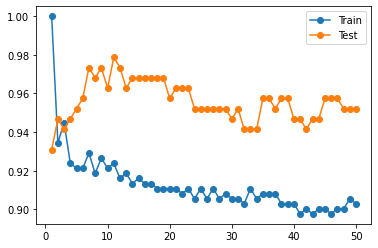

In [18]:
plt.plot(value,train_score, '-o', label = "Train")
plt.plot(value,test_score , '-o', label = 'Test')
plt.legend()
plt.show()